# How to Process, Analyze and Visualize Data (I)
This is a course provided by MIT Open Course Ware.
This notebook solves Exercise 1, using R, which simply consists of downloading the US Election data from 2008 (the link is found on the course website), and plot the donations for Obama and McCain, as a function of time.

We load the donation file.
Note that the file as downloaded could not be loaded because of an error, adding a comma at the end of the first line removed the error. The comma was added using vi (the file was a bit heavy to load with say gedit).

In [1]:
data <- read.csv('donations.csv')

In [2]:
head(data)
#no of columns
N <- ncol(data)-1
#adding the comma created an empty column, which is removed
data <- data[1:N]
head(data)

cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,X
C00420224,P80002983,"Cox, John H","BROWN, CHARLENE",EAGLE RIVER,AK,99577,,STUDENT,25,01-MAR-07,,,,SA17A,288757,SA17A.5211,P2008,NA
C00420224,P80002983,"Cox, John H","KELLY, RAY",HUNTSVILLE,AL,35801,ARKTECH,RETIRED,25,25-JAN-07,,,,SA17A,288757,SA17A.5055,P2008,NA
C00420224,P80002983,"Cox, John H","CINGEL, KEITH",SEVERN,AL,20999,SANTA CLAUS,SNOWMAN,50,17-MAY-07,,,,SA17A,305408,SA17A.5593,P2008,NA
C00420224,P80002983,"Cox, John H","DUNAWAY, JONATHON",DEATSVILLE,AL,36022,CSC,TECHNICAL MANAGER,10,18-JAN-07,,,,SA17A,288757,SA17A.5100,P2008,NA
C00420224,P80002983,"Cox, John H","TERRY, R.S. MR. SR.",SHEFFIELD,AL,35660,RETIRED,,25,18-JAN-07,,,,SA17A,288757,SA17A.5138,P2008,NA
C00420224,P80002983,"Cox, John H","CANADY, DALE",PHOENIX,AZ,85051,RETIRED,,25,11-JAN-07,,,,SA17A,288757,SA17A.5076,P2008,NA


cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00420224,P80002983,"Cox, John H","BROWN, CHARLENE",EAGLE RIVER,AK,99577,,STUDENT,25,01-MAR-07,,,,SA17A,288757,SA17A.5211,P2008
C00420224,P80002983,"Cox, John H","KELLY, RAY",HUNTSVILLE,AL,35801,ARKTECH,RETIRED,25,25-JAN-07,,,,SA17A,288757,SA17A.5055,P2008
C00420224,P80002983,"Cox, John H","CINGEL, KEITH",SEVERN,AL,20999,SANTA CLAUS,SNOWMAN,50,17-MAY-07,,,,SA17A,305408,SA17A.5593,P2008
C00420224,P80002983,"Cox, John H","DUNAWAY, JONATHON",DEATSVILLE,AL,36022,CSC,TECHNICAL MANAGER,10,18-JAN-07,,,,SA17A,288757,SA17A.5100,P2008
C00420224,P80002983,"Cox, John H","TERRY, R.S. MR. SR.",SHEFFIELD,AL,35660,RETIRED,,25,18-JAN-07,,,,SA17A,288757,SA17A.5138,P2008
C00420224,P80002983,"Cox, John H","CANADY, DALE",PHOENIX,AZ,85051,RETIRED,,25,11-JAN-07,,,,SA17A,288757,SA17A.5076,P2008


In [10]:
summary(data)

      cmte_id             cand_id                           cand_nm       
 C00431445:2600437   P80003338:2600437   Obama, Barack          :2600437  
 C00431569: 545162   P00003392: 545162   Clinton, Hillary Rodham: 545162  
 C00430470: 408810   P80002801: 477267   McCain, John S         : 477267  
 C00432914:  88574   P80000748:  88574   Paul, Ron              :  88574  
 C00431205:  85857   P40002347:  85857   Edwards, John          :  85857  
 C00431171:  83380   P80003353:  83380   Romney, Mitt           :  83380  
 (Other)  : 273445   (Other)  : 204988   (Other)                : 204988  
              contbr_nm              contbr_city        contbr_st      
 PRO, DOODAD       :   1627   NEW YORK     : 163340   CA     : 712532  
 WILL, GOOD        :   1608   CHICAGO      :  84213   NY     : 387672  
 SKINNER, DONNA    :    712   WASHINGTON   :  80381   TX     : 232293  
 VANDERBORGH, CRAIG:    537   LOS ANGELES  :  65696   IL     : 221663  
 ANDERSON, JEFF    :    516   SAN FRANCI

We observe that most numbers of records show donations for Obama, Clinton, McCain, Paul, Edwards, and Romney.
We look at donations for Obama over time, the dates are known thanks to the contribution receipt dates. 
Considering the size of the dataframe, we first sample the dataframe, so that the computations can be checked quickly.

In [3]:
#sampled data
ds <- data[sample(nrow(data), 5000),] 
head(ds)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
1289779,C00431445,P80003338,"Obama, Barack","SALOTTOLO, TOBI",BETHEL,CT,068011313,PRONER & PRONER,ATTORNEY,100,30-JUN-08,,,,SA17A,753769,4372026,P2008
47675,C00430470,P80002801,"McCain, John S","HALL, WARREN G. MR.",HUNTINGTON BEACH,CA,926463531,RETIRED,RETIRED,50,15-AUG-08,,,,SA17A,876975,SA17.1653213,P2008
646696,C00431205,P40002347,"Edwards, John","WALP, ROBERT",HOUSTON,TX,770096513,HOUSTON SYMPHONY SOCIETY,MUSICIAN,500,26-DEC-07,,,,SA17A,328622,282092,P2008
2147083,C00431445,P80003338,"Obama, Barack","KUMIA, JOHN",COLUMBIA,MO,652110001,UNIVERSITY OF MISSOURI-COLUMBIA,ADMINISTRATIVE ASSISTANT,30,26-JUN-08,,,,SA17A,753769,3795215,P2008
3973380,C00432914,P80000748,"Paul, Ron","HAWKINS, JOHN B MR.",SAN ANTONIO,TX,78212,PARSONS,ASSISTANT PROJECT MANAGER,250,01-FEB-08,,,,SA17A,338919,0469670,P2008
97064,C00430470,P80002801,"McCain, John S","FREY, LAWRENCE M. MR.",DURHAM,CT,064221905,SELF-EMPLOYED,OWNER,500,02-APR-08,,,,SA17A,876920,SA17.763444,P2008


We make sure we are able to find the records for Obama's contributors, and indeed, we get the same number of persons who contributed to Obama.

In [4]:
nrow(ds[grep("Obama", ds$cand_nm, ignore.case=T),])

[1] 3148

In [5]:
summary(ds)

      cmte_id          cand_id                        cand_nm    
 C00431445:3148   P80003338:3148   Obama, Barack          :3148  
 C00431569: 649   P00003392: 649   Clinton, Hillary Rodham: 649  
 C00430470: 532   P80002801: 621   McCain, John S         : 621  
 C00432914: 122   P80000748: 122   Paul, Ron              : 122  
 C00431205: 105   P40002347: 105   Edwards, John          : 105  
 C00431171:  93   P80003353:  93   Romney, Mitt           :  93  
 (Other)  : 351   (Other)  : 262   (Other)                : 262  
                contbr_nm           contbr_city     contbr_st   
 TAYLOR, WILLIAM     :   3   NEW YORK     : 186   CA     : 879  
 ALLEN, ANGELA       :   2   CHICAGO      : 108   NY     : 441  
 ALLEN, MARY         :   2   WASHINGTON   :  99   TX     : 291  
 BARKER, COLETTE     :   2   SAN FRANCISCO:  79   IL     : 277  
 BENACK, MARY ANN ANN:   2   LOS ANGELES  :  70   FL     : 254  
 BLAMBERG, SIEGMAR   :   2   SEATTLE      :  64   (Other):2845  
 (Other)         

This function computes the amount of donations per day for a given candidate.

In [3]:
donationDate <- function(df,cand){
    #df = whole data or sample, cand = candidate's name
    #we extract the candidate's donations from sample data
    dfcand <- df[grep(cand, df$cand_nm, ignore.case=T),] 
    #we collect the different dates at which donations were made
    list_dates <- unique(dfcand$contb_receipt_dt)
    #order dates chronologically 
    #(check that all dates are read properly, if NA is seen, check OS calendar to make sure the right language is set)
    list_dates <- list_dates[order(as.Date(list_dates,"%d-%b-%y"))]
    #to collect each amount donated per date
    amt_dt <- vector()
    for (dt in list_dates){
        #for every date, find and add up the donations
        sm_dt <- sum(dfcand[dfcand$contb_receipt_dt == dt,]$contb_receipt_amt)
        #append
        amt_dt <-c(amt_dt,sm_dt)
    }
    res <- list(amt_dt,list_dates)
    return(res)
}


We try the function for the candidate Obama, using the sampled data.

In [20]:
resObs <- donationDate(ds,"Obama")

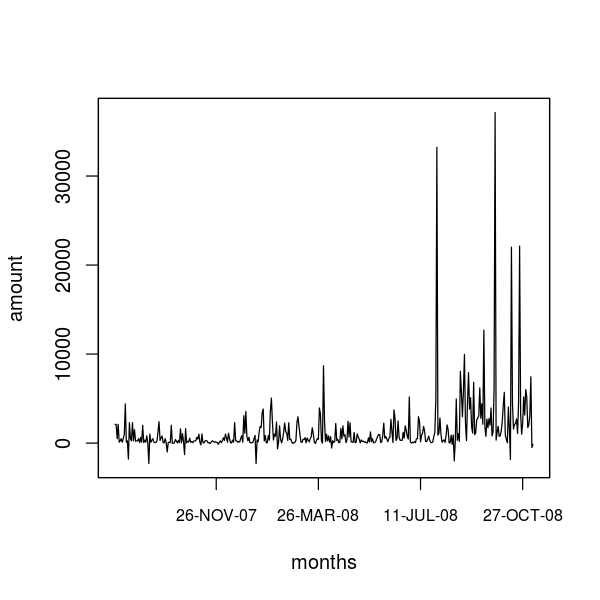

In [21]:
# Change plot size 
library(repr)
options(repr.plot.width = 5, repr.plot.height = 5)
#l for line, remove the labels on the x-axis
plot(resObs[[1]],type='l',xaxt='n', xlab='months',ylab='amount')
#cex.axis changes the font size
axis(1, at=c(100,200,300,400), lab=resObs[[2]][c(100,200,300,400)],cex.axis=0.8)
box()

The plot seems to be working, so lets try with the whole data (this takes a while...).

In [4]:
start.time <- Sys.time()
resOb <- donationDate(data,"Obama")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 7.709405 mins

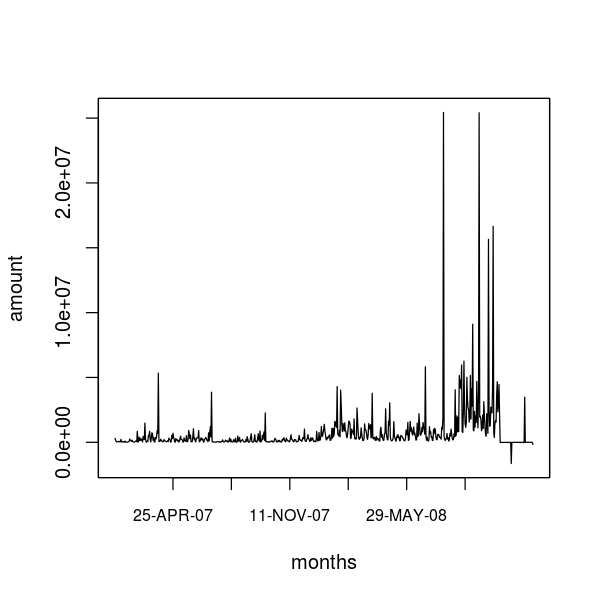

In [24]:
# Change plot size 
library(repr)
options(repr.plot.width = 5, repr.plot.height = 5)
#l for line, remove the labels on the x-axis
plot(resOb[[1]],type='l',xaxt='n', xlab='months',ylab='amount')
#cex.axis changes the font size
axis(1, at=c(100,200,300,400,500,600), lab=resOb[[2]][c(100,200,300,400,500,600)],cex.axis=0.8)
box()

The plot looks different from what we should get, according to the course material. We check that we got the amounts right. Things look fine, probably the data may have been updated after the course plots were made?

In [26]:
sum(data[grep("Obama", data$cand_nm, ignore.case=T),]$contb_receipt_amt)
sum(resOb[[1]])

[1] 507034409

[1] 507034409

We try with the sampled data and Mc Cain as candidate.

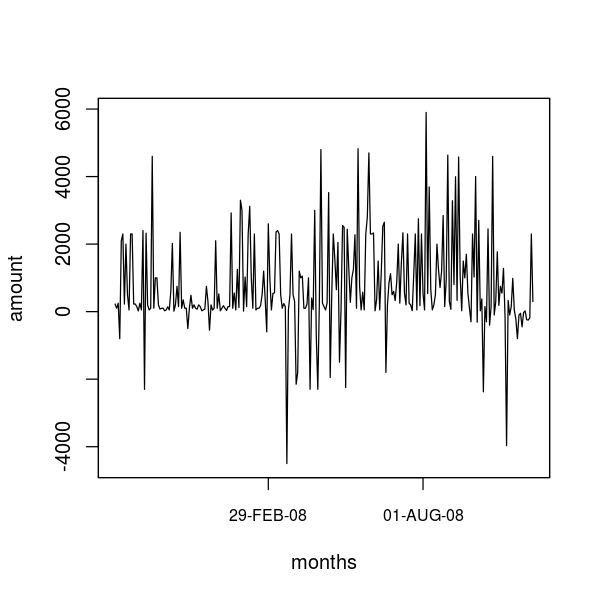

In [22]:
resMcs <- donationDate(ds,"McCain")
# Change plot size 
library(repr)
options(repr.plot.width = 5, repr.plot.height = 5)
#l for line, remove the labels on the x-axis
plot(resMcs[[1]],type='l',xaxt='n', xlab='months',ylab='amount')
#cex.axis changes the font size
axis(1, at=c(100,200), lab=resMcs[[2]][c(100,200)],cex.axis=0.8)
box()

We now use all the data instead of the sampled one.

In [5]:
resMc <- donationDate(data,"McCain")

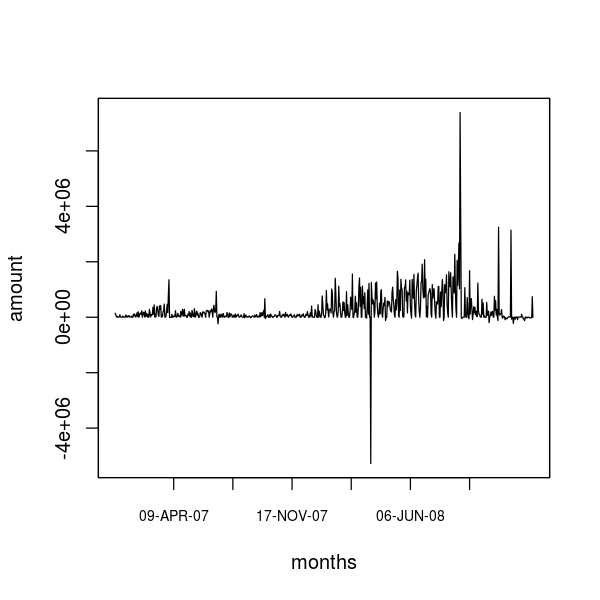

In [33]:
# Change plot size 
library(repr)
options(repr.plot.width = 5, repr.plot.height = 5)
#l for line, remove the labels on the x-axis
plot(resMc[[1]],type='l',xaxt='n', xlab='months',ylab='amount')
#cex.axis changes the font size
axis(1, at=c(100,200,300,400,500,600), lab=resMc[[2]][c(100,200,300,400,500,600)],cex.axis=0.7)
box()

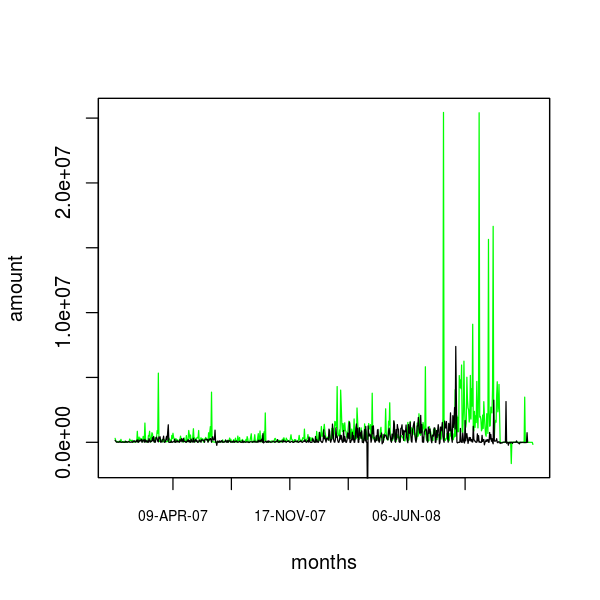

In [7]:
library(repr)
options(repr.plot.width = 5, repr.plot.height = 5)
plot(resOb[[1]],type='l',xaxt='n', xlab='months',ylab='amount',col="green")
lines(resMc[[1]],col="black")
#cex.axis changes the font size
axis(1, at=c(100,200,300,400,500,600), lab=resMc[[2]][c(100,200,300,400,500,600)],cex.axis=0.7)
box()

This plot corresponds to Exercise 1, plot Obama vs McCain. We notice some strange peak below 0.